In [1]:
import numpy as np
import pandas as pd
import itertools

from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison
import seaborn as sns

from tqdm.notebook import tqdm_notebook as tqdm

from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

**jain data**

Accuracy for C = 0.1, Linear Kernel: 0.9333333333333333


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


Accuracy for C = 0.1, Linear Kernel, Repetition: 0.9333333333333333


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


Accuracy for C = 0.1, Polynomial Kernel: 0.9066666666666666


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


Accuracy for C = 1, RBF Kernel: 0.9333333333333333


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


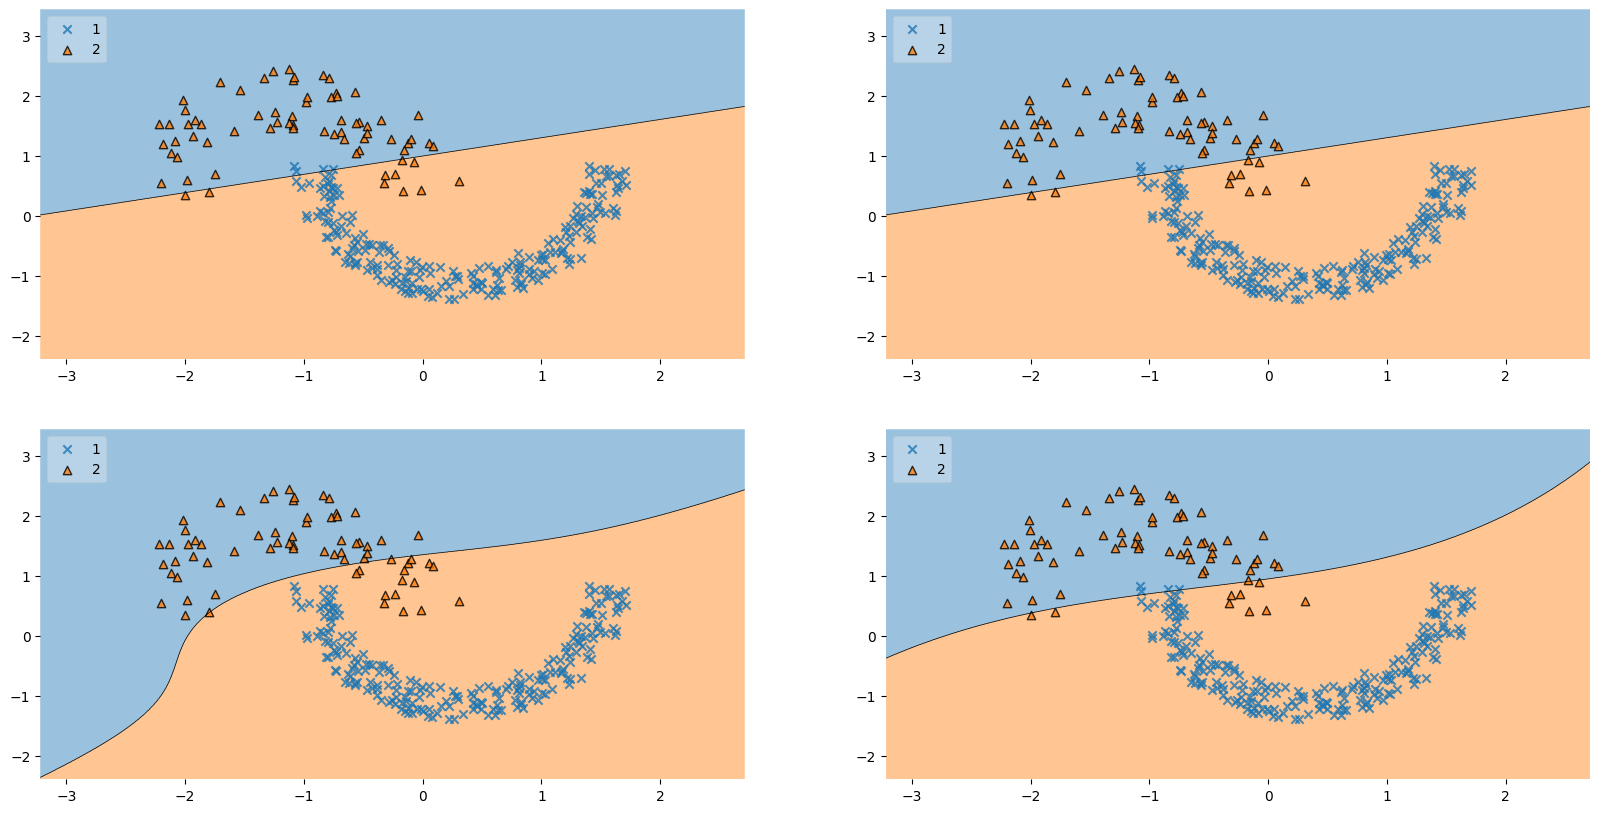

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec

# Read the text file as CSV, skipping the first 7 lines and using tab as the delimiter
df = pd.read_csv('/content/Jain.txt', delimiter='\t', skiprows=7)


# Rename columns for clarity
df.rename(columns={'0.85': 'Feature 1', '17.45': 'Feature 2', '2': 'Class'}, inplace=True)

# Extract features and target variable
X = df[['Feature 1', 'Feature 2']].values
y = df['Class'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Prepare for multiple classifier comparisons
gs = gridspec.GridSpec(2, 2)
plt.rcParams['figure.figsize'] = (20, 10)
classifiers = [
    (SVC(C=0.1, kernel='linear'), 'C = 0.1, Linear Kernel'),
    (SVC(C=0.1, kernel='linear'), 'C = 0.1, Linear Kernel, Repetition'),  # Intentional repetition for example
    (SVC(C=0.1, kernel='poly', degree=3), 'C = 0.1, Polynomial Kernel'),
    (SVC(C=1, kernel='rbf', gamma=0.1), 'C = 1, RBF Kernel')
]

# Train, predict and plot for each classifier
for (clf, label), grd in zip(classifiers, itertools.product([0, 1], repeat=2)):
    clf.fit(X_train_scaled, y_train)  # Fit on the scaled training data
    y_pred = clf.predict(X_test_scaled)  # Predict using the scaled test data
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    print(f"Accuracy for {label}: {accuracy}")

    # Plot decision regions
    ax = plt.subplot(gs[grd[0], grd[1]])
    plot_decision_regions(X=X_train_scaled, y=y_train, clf=clf, legend=2, markers='x^sv<>')


plt.show()


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


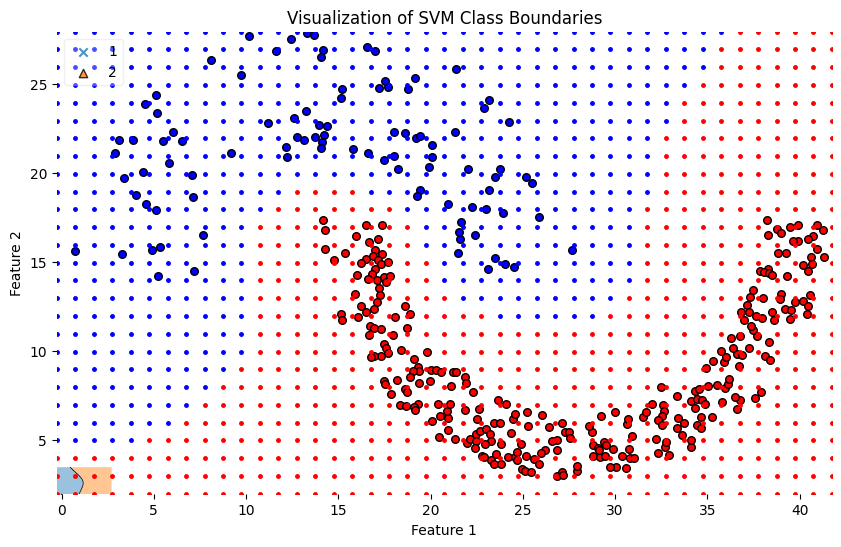

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

# Data importation
data_frame = pd.read_csv('/content/Jain.txt', delimiter='\t', skiprows=7)

# Updating column names for better readability
data_frame.columns = ['Feature_1', 'Feature_2', 'Target']

# Selecting features and the target from the dataframe
features = data_frame[['Feature_1', 'Feature_2']].values
targets = data_frame['Target'].values

# Data partition into training and test subsets
features_train, features_test, targets_train, targets_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# Feature scaling for normalization
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

# Setup for the visualization grid
x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1

grid_step = 1
grid_x, grid_y = np.meshgrid(np.arange(x_min, x_max, grid_step), np.arange(y_min, y_max, grid_step))

# Preparing mesh grid as input for SVM
grid_features = np.c_[grid_x.ravel(), grid_y.ravel()]
grid_features_scaled = scaler.transform(grid_features)

# SVM model training with radial basis function kernel
svm_classifier = SVC(kernel='rbf', gamma=2, C=2)
svm_classifier.fit(features_train_scaled, targets_train)

# Class prediction over the grid
grid_predictions = svm_classifier.predict(grid_features_scaled)
grid_predictions_reshaped = grid_predictions.reshape(grid_x.shape)

plt.figure(figsize=(10, 6))
color_list = ['red', 'blue']
color_mapping = {class_label: color for class_label, color in zip(np.unique(targets_train), color_list)}

# Decision region plotting using mlxtend
plot_decision_regions(features_train_scaled, targets_train, clf=svm_classifier, legend=2, markers='x^sv<>', scatter_highlight_kwargs={'s': 100, 'label': 'Test Data'})

# Overlay of the actual data points
for class_value in np.unique(targets):
    plt.scatter(features[targets == class_value, 0], features[targets == class_value, 1], c=color_mapping[class_value], label=f'Class {class_value}', edgecolors='k', s=30)

# Visualization of classified grid points
for row in range(grid_x.shape[0]):
    for col in range(grid_x.shape[1]):
        grid_point = np.array([[grid_x[row, col], grid_y[row, col]]])
        grid_point_scaled = scaler.transform(grid_point)
        class_prediction = svm_classifier.predict(grid_point_scaled)
        plt.plot(grid_x[row, col], grid_y[row, col], marker='.', markersize=5, c=color_mapping[class_prediction[0]])

plt.xlim(grid_x.min(), grid_x.max())
plt.ylim(grid_y.min(), grid_y.max())
plt.title("Visualization of SVM Class Boundaries")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


**aggregation**

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('bl

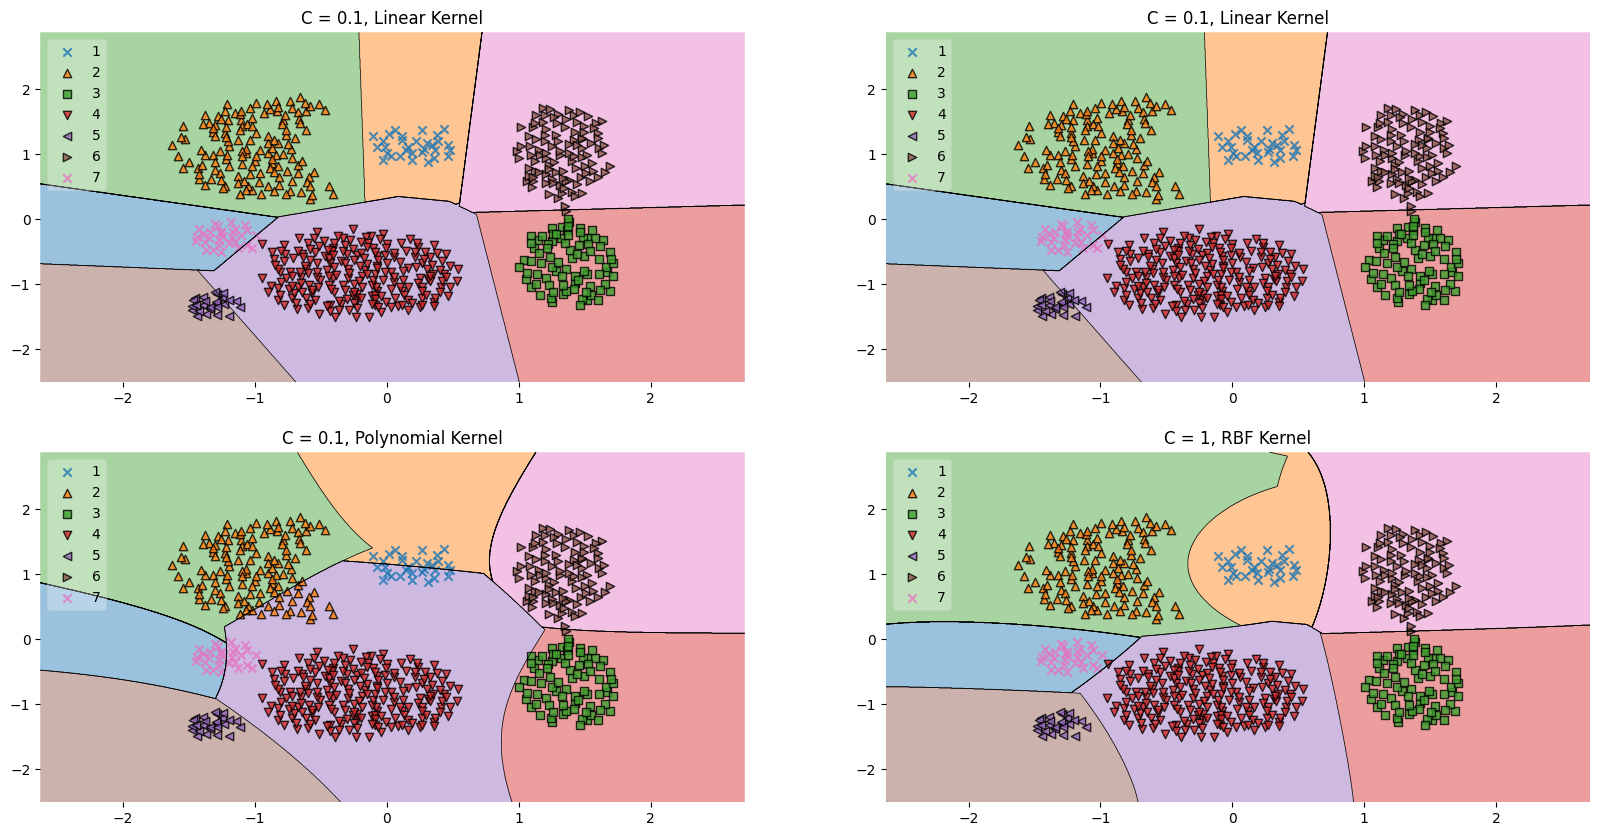

Accuracy for C = 0.1, Linear Kernel: 0.9683544303797469
Accuracy for C = 0.1, Linear Kernel: 0.9683544303797469
Accuracy for C = 0.1, Polynomial Kernel: 0.9113924050632911
Accuracy for C = 0.1, RBF Kernel: 0.9936708860759493


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import itertools
import matplotlib.gridspec as gridspec
df = pd.read_csv('/content/Aggregation.txt', delimiter='\t', skiprows=7)
# Load the data
df.rename(columns={'15.55': 'Feature 1', '28.65': 'Feature 2', '2': 'Class'}, inplace=True)

# Extract features and target variable
X = df[['Feature 1', 'Feature 2']].values
y = df['Class'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model with RBF kernel
svm_model = SVC(kernel='rbf', gamma=0.1, C=1.0)  # You can adjust gamma and C as needed
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# Visualize decision boundary and data points with class background
plt.figure(figsize=(20, 10))

clf1 = SVC(C=0.1, kernel='linear')
clf2 = SVC(C=0.1, kernel='linear')
clf3 = SVC(C=0.1, kernel='poly')
clf4 = SVC(C=1, kernel='rbf')

scatter_highlight_kwargs = {'s': 50, 'label': 'Test data', 'alpha': 0.7, 'linestyle':'-'}
labels = ['C = 0.1, Linear Kernel', 'C = 0.1, Linear Kernel', 'C = 0.1, Polynomial Kernel', 'C = 1, RBF Kernel']

gs = gridspec.GridSpec(2, 2)

for clf, lab, grd in zip([clf1, clf2, clf3, clf4], labels, itertools.product([0, 1], repeat=2)):
    clf.fit(X_train_scaled, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    plot_decision_regions(X=X_train_scaled, y=y_train, clf=clf, legend=2, markers='x^sv<>', scatter_highlight_kwargs=scatter_highlight_kwargs)
    plt.title(lab)

plt.show()
# Define the list of classifiers with their corresponding labels
classifiers = [(clf1, 'C = 0.1, Linear Kernel'), (clf2, 'C = 0.1, Linear Kernel'),
               (clf3, 'C = 0.1, Polynomial Kernel'), (clf4, 'C = 0.1, RBF Kernel')]

# Calculate accuracy for each classifier
for clf, label in classifiers:
    # Make predictions on the test set
    y_pred = clf.predict(X_test_scaled)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # Print accuracy
    print(f"Accuracy for {label}: {accuracy}")


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


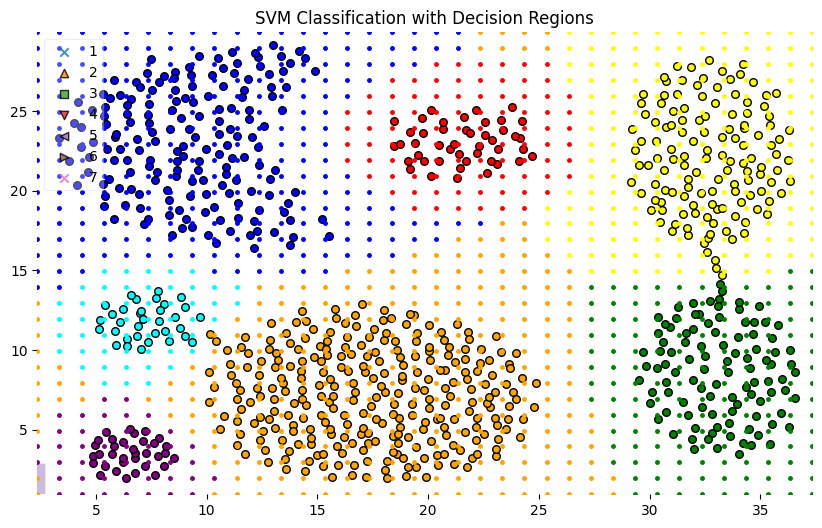

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

# Data loading
dataset = pd.read_csv('/content/Aggregation.txt', delimiter='\t', skiprows=7)
# Update column names
dataset.columns = ['Feature_1', 'Feature_2', 'Target']

# Selecting features and target
feature_data = dataset[['Feature_1', 'Feature_2']].values
target_data = dataset['Target'].values

# Partition data into training and testing subsets
feature_train, feature_test, target_train, target_test = train_test_split(feature_data, target_data, test_size=0.2, random_state=42)

# Normalization of features
feature_scaler = StandardScaler()
feature_train_scaled = feature_scaler.fit_transform(feature_train)
feature_test_scaled = feature_scaler.transform(feature_test)

# Grid for background classification visualization
grid_x_min, grid_x_max = feature_data[:, 0].min() - 1, feature_data[:, 0].max() + 1
grid_y_min, grid_y_max = feature_data[:, 1].min() - 1, feature_data[:, 1].max() + 1

grid_step = 1
grid_x, grid_y = np.meshgrid(np.arange(grid_x_min, grid_x_max, grid_step), np.arange(grid_y_min, grid_y_max, grid_step))

# Mesh grid for SVM input
grid_points = np.c_[grid_x.ravel(), grid_y.ravel()]
grid_points_scaled = feature_scaler.transform(grid_points)

# SVM training with RBF kernel settings
svm_classifier = SVC(kernel='rbf', gamma=5, C=5)
svm_classifier.fit(feature_train_scaled, target_train)

# Prediction over the grid
grid_predictions = svm_classifier.predict(grid_points_scaled)
grid_predictions_reshaped = grid_predictions.reshape(grid_x.shape)

plt.figure(figsize=(10, 6))

# Plot decision regions using mlxtend's function
plot_decision_regions(feature_train_scaled, target_train, clf=svm_classifier, legend=2, markers='x^sv<>', scatter_highlight_kwargs={'s': 100, 'label': 'Test Data'})

# Color configuration for classes
high_contrast_colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'brown', 'black']
color_dictionary = {label: color for label, color in zip(np.unique(target_train), high_contrast_colors)}

# Original data points visualization
for class_value in np.unique(target_data):
    plt.scatter(feature_data[target_data == class_value, 0], feature_data[target_data == class_value, 1], c=color_dictionary[class_value], label=f'Class {class_value}', edgecolors='k', s=30)

# Classified grid points visualization
for i in range(grid_x.shape[0]):
    for j in range(grid_y.shape[1]):
        grid_sample = np.array([[grid_x[i, j], grid_y[i, j]]])
        grid_sample_scaled = feature_scaler.transform(grid_sample)
        prediction = svm_classifier.predict(grid_sample_scaled)
        plt.plot(grid_x[i, j], grid_y[i, j], marker='.', markersize=5, c=color_dictionary[prediction[0]])

plt.xlim(grid_x.min(), grid_x.max())
plt.ylim(grid_y.min(), grid_y.max())
plt.title("SVM Classification with Decision Regions")
# plt.legend()
plt.show()


**Compound data**

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('bl

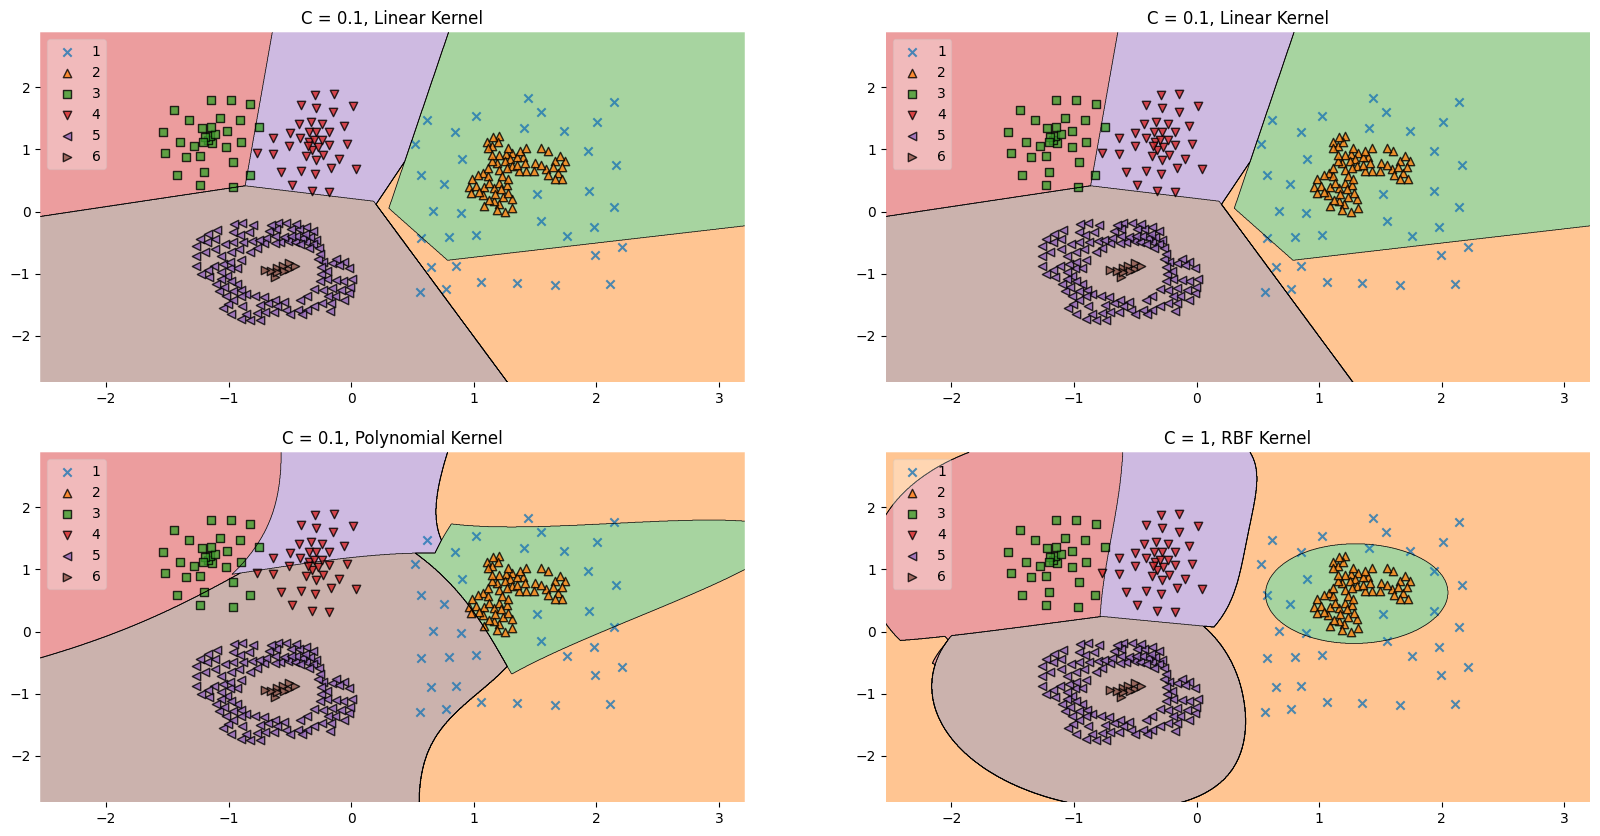

Accuracy for C = 0.1, Linear Kernel: 0.8125
Accuracy for C = 0.1, Linear Kernel: 0.8125
Accuracy for C = 0.1, Polynomial Kernel: 0.75
Accuracy for C = 1, RBF Kernel: 0.9


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import itertools
import matplotlib.gridspec as gridspec

# Load the data
df = pd.read_csv('/content/Compound.txt', delimiter='\t', skiprows=7)

# Rename columns for clarity
df.rename(columns={'26.75': 'Feature 1', '22.15': 'Feature 2', '1': 'Class'}, inplace=True)

# Extract features and target variable
X = df[['Feature 1', 'Feature 2']].values
y = df['Class'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model with RBF kernel
svm_model = SVC(kernel='rbf', gamma=0.1, C=1.0)  # You can adjust gamma and C as needed
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# Visualize decision boundary and data points with class background
plt.figure(figsize=(20, 10))

clf1 = SVC(C=0.1, kernel='linear')
clf2 = SVC(C=0.1, kernel='linear')
clf3 = SVC(C=0.1, kernel='poly')
clf4 = SVC(C=1, kernel='rbf')

scatter_highlight_kwargs = {'s': 50, 'label': 'Test data', 'alpha': 0.7, 'linestyle':'-'}
labels = ['C = 0.1, Linear Kernel', 'C = 0.1, Linear Kernel', 'C = 0.1, Polynomial Kernel', 'C = 1, RBF Kernel']

gs = gridspec.GridSpec(2, 2)

for clf, lab, grd in zip([clf1, clf2, clf3, clf4], labels, itertools.product([0, 1], repeat=2)):
    clf.fit(X_train_scaled, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    plot_decision_regions(X=X_train_scaled, y=y_train, clf=clf, legend=2, markers='x^sv<>', scatter_highlight_kwargs=scatter_highlight_kwargs)
    plt.title(lab)

plt.show()

# Define the list of classifiers with their corresponding labels
classifiers = [(clf1, 'C = 0.1, Linear Kernel'), (clf2, 'C = 0.1, Linear Kernel'),
               (clf3, 'C = 0.1, Polynomial Kernel'), (clf4, 'C = 1, RBF Kernel')]

# Calculate accuracy for each classifier
for clf, label in classifiers:
    # Make predictions on the test set
    y_pred = clf.predict(X_test_scaled)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # Print accuracy
    print(f"Accuracy for {label}: {accuracy}")


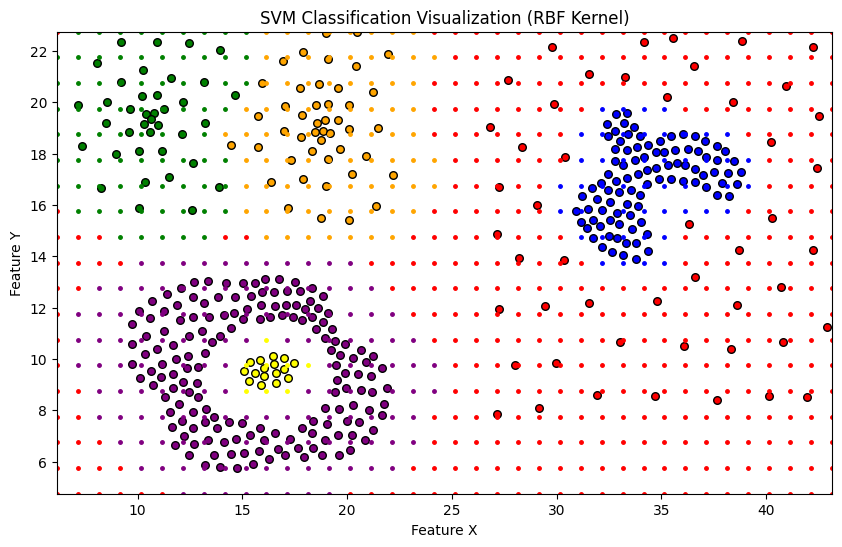

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split

# Reading the dataset
data = pd.read_csv('/content/Compound.txt', delimiter='\t', skiprows=7)

# Update column headers
data.columns = ['Feature_X', 'Feature_Y', 'Category']

# Extracting the features and labels
features = data[['Feature_X', 'Feature_Y']].values
labels = data['Category'].values

# Dividing data into training and validation sets
X_train, X_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Normalizing the feature vectors
norm_scaler = StandardScaler()
X_train_norm = norm_scaler.fit_transform(X_train)
X_test_norm = norm_scaler.transform(X_test)

# Setting up the visualization grid
x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1
grid_step = 1
grid_x, grid_y = np.meshgrid(np.arange(x_min, x_max, grid_step), np.arange(y_min, y_max, grid_step))

# Preparing grid data for SVM input
visualization_grid = np.c_[grid_x.ravel(), grid_y.ravel()]
grid_scaled = norm_scaler.transform(visualization_grid)

# Configuring and training the SVM with RBF kernel
svm = SVC(kernel='rbf', gamma=10, C=1)
svm.fit(X_train_norm, labels_train)

# Classifying every point on the grid
grid_predictions = svm.predict(grid_scaled)
grid_predictions = grid_predictions.reshape(grid_x.shape)

plt.figure(figsize=(10, 6))

# Defining colors and markers for plotting
palette = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'brown', 'black']
label_color_map = {label: color for label, color in zip(np.unique(labels_train), palette)}

# Displaying the original data points with classification colors
for class_label in np.unique(labels):
    plt.scatter(features[labels == class_label, 0], features[labels == class_label, 1], c=label_color_map[class_label], label=f'Category {class_label}', edgecolors='k', s=30)

# Displaying the SVM classification results on the grid
for i in range(grid_x.shape[0]):
    for j in range(grid_y.shape[1]):
        classified_point = np.array([[grid_x[i, j], grid_y[i, j]]])
        point_scaled = norm_scaler.transform(classified_point)
        classification = svm.predict(point_scaled)
        plt.plot(grid_x[i, j], grid_y[i, j], marker='.', markersize=5, c=label_color_map[classification[0]])

plt.xlim(grid_x.min(), grid_x.max())
plt.ylim(grid_y.min(), grid_y.max())
plt.title("SVM Classification Visualization (RBF Kernel)")
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.show()


Flame **Data**

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('bl

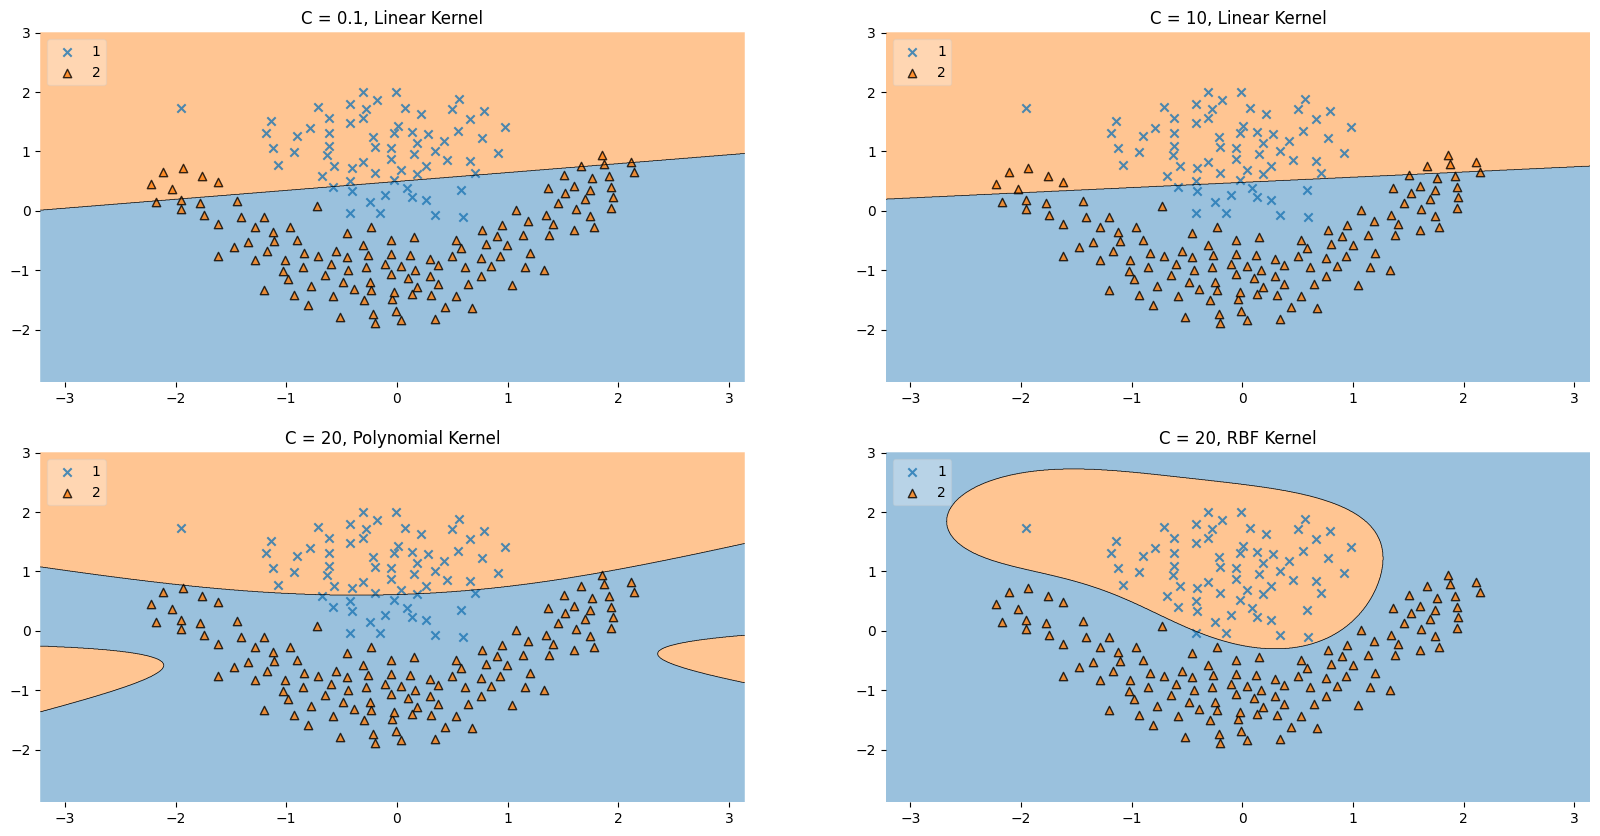

Accuracy for C = 0.1, Linear Kernel: 0.8958333333333334
Accuracy for C = 10, Linear Kernel: 0.9166666666666666
Accuracy for C = 20, Polynomial Kernel: 0.8958333333333334
Accuracy for C = 20, RBF Kernel: 0.9791666666666666


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import itertools
import matplotlib.gridspec as gridspec

# Load the data
df = pd.read_csv('/content/Flame.txt', delimiter='\t', skiprows=7)


df.rename(columns={'1.85': 'Feature 1', '27.8': 'Feature 2', '1': 'Class'}, inplace=True)

# Extract features and target variable
X = df[['Feature 1', 'Feature 2']].values
y = df['Class'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model with RBF kernel
svm_model = SVC(kernel='rbf', gamma=0.1, C=1.0)  # You can adjust gamma and C as needed
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# Visualize decision boundary and data points with class background
plt.figure(figsize=(20, 10))

# Initialize SVC classifiers with different parameters
clf1 = SVC(C=0.1, kernel='linear')
clf2 = SVC(C=10, kernel='linear')
clf3 = SVC(C=20, kernel='poly')
clf4 = SVC(C=20, kernel='rbf')

# Set scatter_highlight_kwargs for highlighting test data
scatter_highlight_kwargs = {'s': 50, 'label': 'Test data', 'alpha': 0.7, 'linestyle':'-'}

# Define labels for classifiers
labels = ['C = 0.1, Linear Kernel', 'C = 10, Linear Kernel', 'C = 20, Polynomial Kernel', 'C = 20, RBF Kernel']

# Define a grid for subplots
gs = gridspec.GridSpec(2, 2)

# Plot decision regions for each classifier
for clf, lab, grd in zip([clf1, clf2, clf3, clf4], labels, itertools.product([0, 1], repeat=2)):
    clf.fit(X_train_scaled, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    plot_decision_regions(X=X_train_scaled, y=y_train, clf=clf, legend=2, markers='x^sv<>', scatter_highlight_kwargs=scatter_highlight_kwargs)
    plt.title(lab)

plt.show()



# Define the list of classifiers with their corresponding labels
classifiers = [(clf1, 'C = 0.1, Linear Kernel'), (clf2, 'C = 10, Linear Kernel'),
               (clf3, 'C = 20, Polynomial Kernel'), (clf4, 'C = 20, RBF Kernel')]

# Calculate accuracy for each classifier
for clf, label in classifiers:
    # Make predictions on the test set
    y_pred = clf.predict(X_test_scaled)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # Print accuracy
    print(f"Accuracy for {label}: {accuracy}")



/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


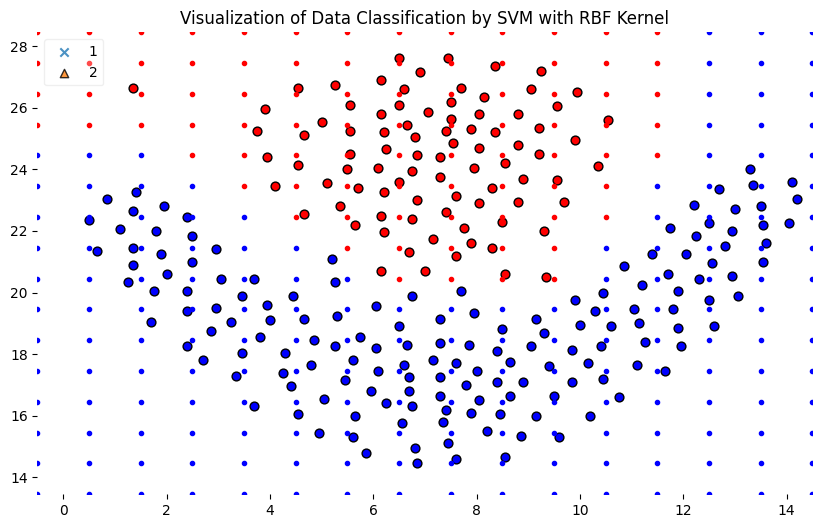

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

# Importing data
dataset = pd.read_csv('/content/Flame.txt', delimiter='\t', skiprows=7)
dataset.rename(columns={'1.85': 'Feature_1', '27.8': 'Feature_2', '1': 'Label'}, inplace=True)

# Preparing data
features = dataset[['Feature_1', 'Feature_2']].values
labels = dataset['Label'].values

# Data partitioning
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Normalizing the data
normalizer = StandardScaler()
features_train_norm = normalizer.fit_transform(features_train)
features_test_norm = normalizer.transform(features_test)

# Setting up the grid for visualization
min_x, max_x = features[:, 0].min() - 1, features[:, 0].max() + 1
min_y, max_y = features[:, 1].min() - 1, features[:, 1].max() + 1
grid_step = 1
x_grid, y_grid = np.meshgrid(np.arange(min_x, max_x, grid_step), np.arange(min_y, max_y, grid_step))

# Preparing mesh grid
visualization_mesh = np.c_[x_grid.ravel(), y_grid.ravel()]
visualization_mesh_scaled = normalizer.transform(visualization_mesh)

# SVM configuration and training
svm_classifier = SVC(kernel='rbf', gamma=2, C=2)
svm_classifier.fit(features_train_norm, labels_train)

# Grid predictions
predictions = svm_classifier.predict(visualization_mesh_scaled)
predictions_reshaped = predictions.reshape(x_grid.shape)

plt.figure(figsize=(10, 6))
class_colors = ['red', 'blue']
color_scheme = {class_id: color for class_id, color in zip(np.unique(labels_train), class_colors)}

# Display decision regions
plot_decision_regions(features_train_norm, labels_train, clf=svm_classifier, legend=2, markers='x^sv<>', scatter_highlight_kwargs={'s': 50, 'label': 'Test Points', 'alpha': 0.7, 'linestyle':'-'})

# Display original data
for label_class in np.unique(labels):
    plt.scatter(features[labels == label_class, 0], features[labels == label_class, 1], c=color_scheme[label_class], label=f'Label {label_class}', edgecolors='k', s=40)

# Display SVM predictions on grid
for row in range(x_grid.shape[0]):
    for col in range(y_grid.shape[1]):
        sample_point = np.array([[x_grid[row, col], y_grid[row, col]]])
        sample_scaled = normalizer.transform(sample_point)
        point_prediction = svm_classifier.predict(sample_scaled)
        plt.plot(x_grid[row, col], y_grid[row, col], marker='.', markersize=6, c=color_scheme[point_prediction[0]])

plt.xlim(x_grid.min(), x_grid.max())
plt.ylim(y_grid.min(), y_grid.max())
plt.title("Visualization of Data Classification by SVM with RBF Kernel")
plt.show()


**Pathbased** **Data**

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('bl

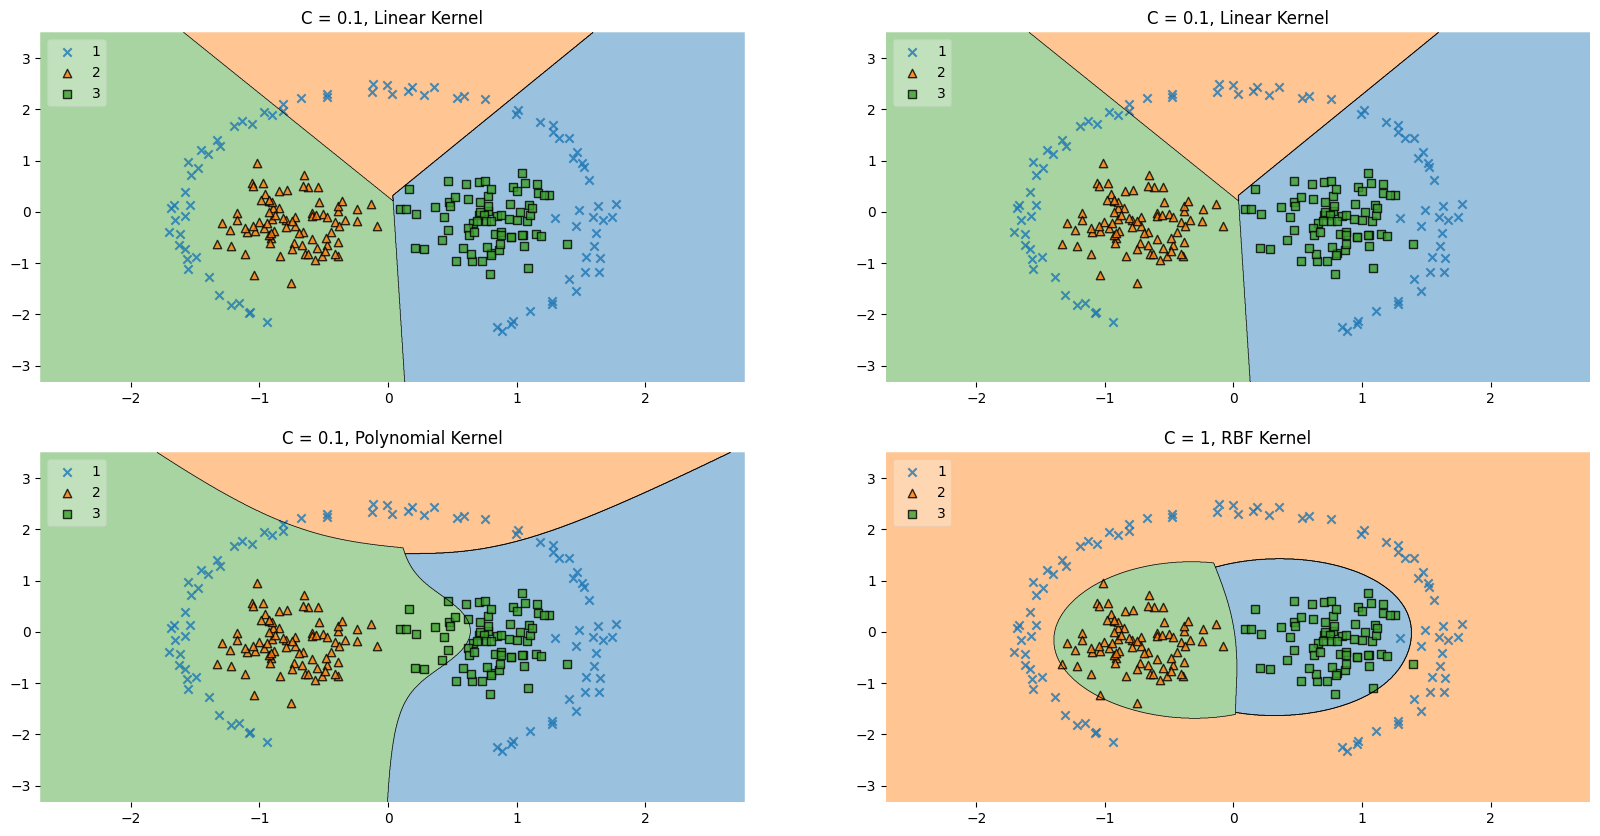

Accuracy for C = 0.1, Linear Kernel: 0.65
Accuracy for C = 0.1, Linear Kernel: 0.65
Accuracy for C = 0.1, Polynomial Kernel: 0.5666666666666667
Accuracy for C = 1, RBF Kernel: 0.9833333333333333


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import itertools
import matplotlib.gridspec as gridspec
df = pd.read_csv('/content/Pathbased.txt', delimiter='\t', skiprows=7)
# Load the data
df.rename(columns={'11.25': 'Feature 1', '5.05': 'Feature 2', '1': 'Class'}, inplace=True)

# Extract features and target variable
X = df[['Feature 1', 'Feature 2']].values
y = df['Class'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model with RBF kernel
svm_model = SVC(kernel='rbf', gamma=0.1, C=1.0)  # You can adjust gamma and C as needed
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)


# Visualize decision boundary and data points with class background
plt.figure(figsize=(20, 10))

clf1 = SVC(C=0.1, kernel='linear')
clf2 = SVC(C=0.1, kernel='linear')
clf3 = SVC(C=0.1, kernel='poly')
clf4 = SVC(C=1, kernel='rbf')

scatter_highlight_kwargs = {'s': 50, 'label': 'Test data', 'alpha': 0.7, 'linestyle':'-'}
labels = ['C = 0.1, Linear Kernel', 'C = 0.1, Linear Kernel', 'C = 0.1, Polynomial Kernel', 'C = 1, RBF Kernel']

gs = gridspec.GridSpec(2, 2)

for clf, lab, grd in zip([clf1, clf2, clf3, clf4], labels, itertools.product([0, 1], repeat=2)):
    clf.fit(X_train_scaled, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    plot_decision_regions(X=X_train_scaled, y=y_train, clf=clf, legend=2, markers='x^sv<>', scatter_highlight_kwargs=scatter_highlight_kwargs)
    plt.title(lab)

plt.show()
# Define the list of classifiers with their corresponding labels
classifiers = [(clf1, 'C = 0.1, Linear Kernel'), (clf2, 'C = 0.1, Linear Kernel'),
               (clf3, 'C = 0.1, Polynomial Kernel'), (clf4, 'C = 1, RBF Kernel')]

# Calculate accuracy for each classifier
for clf, label in classifiers:
    # Make predictions on the test set
    y_pred = clf.predict(X_test_scaled)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # Print accuracy
    print(f"Accuracy for {label}: {accuracy}")


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


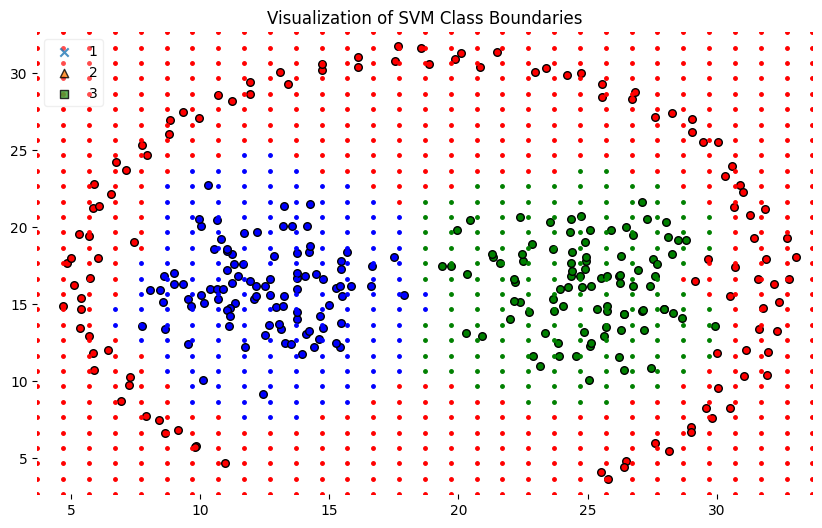

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

# Data acquisition
data_frame = pd.read_csv('/content/Pathbased.txt', delimiter='\t', skiprows=7)
data_frame.rename(columns={'11.25': 'Feature1', '5.05': 'Feature2', '1': 'ClassLabel'}, inplace=True)

# Data preparation
input_features = data_frame[['Feature1', 'Feature2']].values
class_labels = data_frame['ClassLabel'].values

# Splitting dataset into train and test sets
features_train, features_test, labels_train, labels_test = train_test_split(input_features, class_labels, test_size=0.20, random_state=42)

# Feature normalization
standardizer = StandardScaler()
normalized_train_features = standardizer.fit_transform(features_train)
normalized_test_features = standardizer.transform(features_test)

# Generating a grid for visualization
grid_x_min, grid_x_max = input_features[:, 0].min() - 1, input_features[:, 0].max() + 1
grid_y_min, grid_y_max = input_features[:, 1].min() - 1, input_features[:, 1].max() + 1
grid_step = 1
grid_x, grid_y = np.meshgrid(np.arange(grid_x_min, grid_x_max, grid_step), np.arange(grid_y_min, grid_y_max, grid_step))

# Mesh grid creation for SVM input
grid_points = np.c_[grid_x.ravel(), grid_y.ravel()]
grid_points_normalized = standardizer.transform(grid_points)

# SVM configuration and training with radial basis function kernel
svm_classifier = SVC(kernel='rbf', gamma=5, C=5)
svm_classifier.fit(normalized_train_features, labels_train)

# Classifying all points on the grid
classification_results = svm_classifier.predict(grid_points_normalized)
classification_results = classification_results.reshape(grid_x.shape)

plt.figure(figsize=(10, 6))

# Visualization of decision regions
plot_decision_regions(X=normalized_train_features, y=labels_train, clf=svm_classifier, legend=2, markers='x^sv<>', scatter_highlight_kwargs={'s': 50, 'label': 'Test Data', 'alpha': 0.7, 'linestyle':'-'})

# Color mapping for the classes
class_colors = ['red', 'blue', 'green']
color_dict = {class_id: color for class_id, color in zip(np.unique(labels_train), class_colors)}

# Displaying original data points
for class_value in np.unique(class_labels):
    plt.scatter(input_features[class_labels == class_value, 0], input_features[class_labels == class_value, 1], c=color_dict[class_value], label=f'Class {class_value}', edgecolors='k', s=30)

# Overlaying classified grid points
for i in range(grid_x.shape[0]):
    for j in range(grid_y.shape[1]):
        sample = np.array([[grid_x[i, j], grid_y[i, j]]])
        sample_normalized = standardizer.transform(sample)
        class_predict = svm_classifier.predict(sample_normalized)
        plt.plot(grid_x[i, j], grid_y[i, j], marker='.', markersize=5, c=color_dict[class_predict[0]])

plt.xlim(grid_x.min(), grid_x.max())
plt.ylim(grid_y.min(), grid_y.max())
plt.title("Visualization of SVM Class Boundaries")
plt.show()


**Spiral** **Data**

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('bl

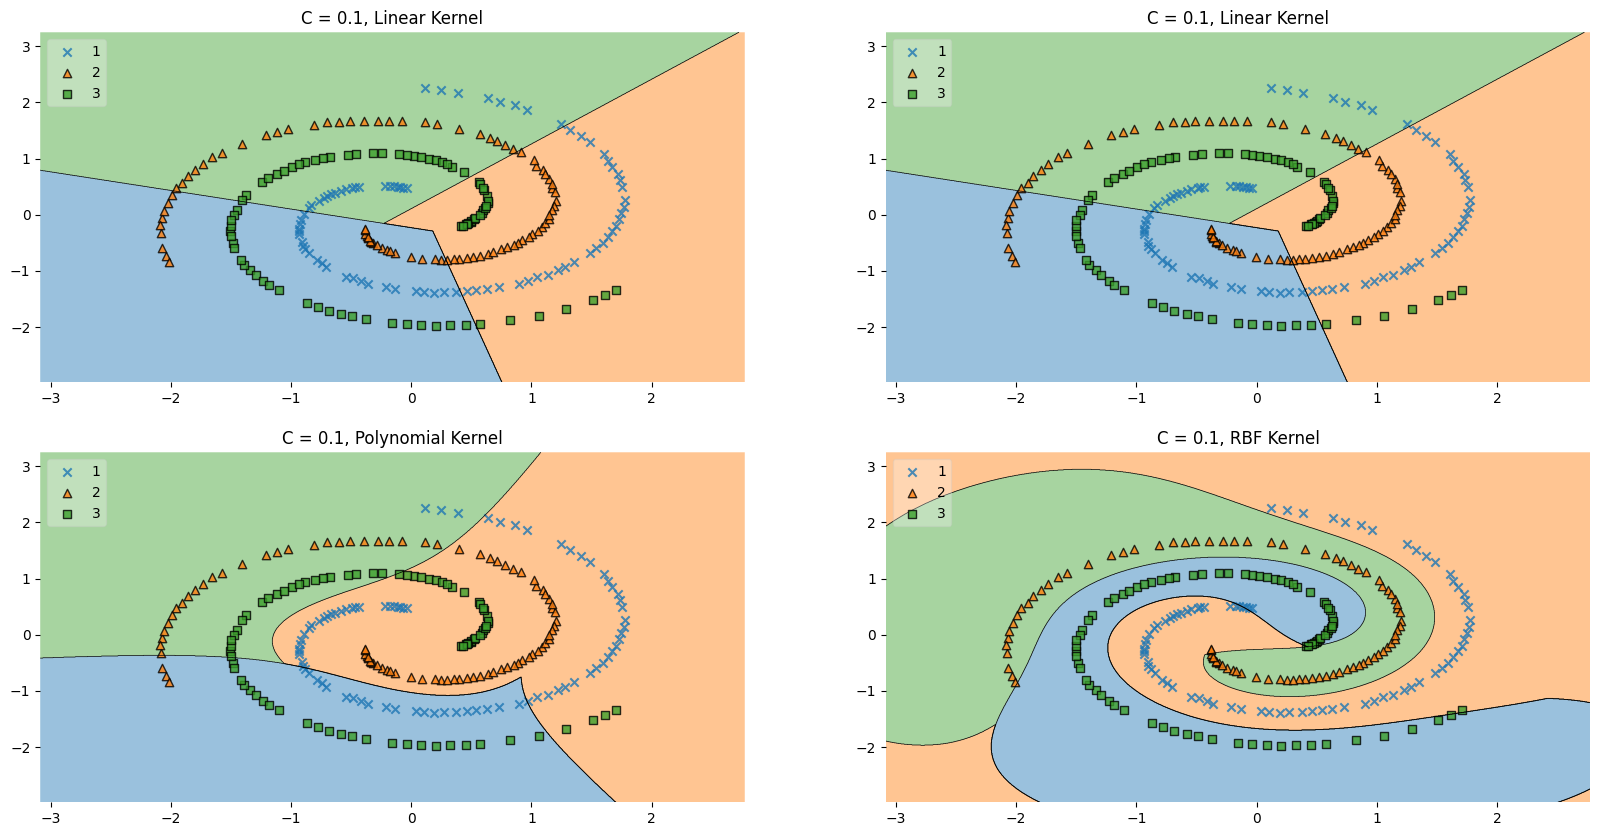

Accuracy for C = 0.1, Linear Kernel: 0.23809523809523808
Accuracy for C = 0.1, Linear Kernel: 0.23809523809523808
Accuracy for C = 0.1, Polynomial Kernel: 0.38095238095238093
Accuracy for C = 0.1, RBF Kernel: 0.9523809523809523


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import itertools
import matplotlib.gridspec as gridspec
df = pd.read_csv('/content/Spiral.txt', delimiter='\t', skiprows=7)
# Load the data
df.rename(columns={'31.95': 'Feature 1', '7.95': 'Feature 2', '3': 'Class'}, inplace=True)

# Extract features and target variable
X = df[['Feature 1', 'Feature 2']].values
y = df['Class'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model with RBF kernel
svm_model = SVC(kernel='rbf', gamma=0.1, C=1.0)  # You can adjust gamma and C as needed
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# Visualize decision boundary and data points with class background
plt.figure(figsize=(20, 10))

clf1 = SVC(C=0.1, kernel='linear')
clf2 = SVC(C=0.1, kernel='linear')
clf3 = SVC(C=0.1, kernel='poly')
clf4 = SVC(C=1, kernel='rbf')

scatter_highlight_kwargs = {'s': 50, 'label': 'Test data', 'alpha': 0.7, 'linestyle':'-'}
labels = ['C = 0.1, Linear Kernel', 'C = 0.1, Linear Kernel', 'C = 0.1, Polynomial Kernel', 'C = 0.1, RBF Kernel']

gs = gridspec.GridSpec(2, 2)

for clf, lab, grd in zip([clf1, clf2, clf3, clf4], labels, itertools.product([0, 1], repeat=2)):
    clf.fit(X_train_scaled, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    plot_decision_regions(X=X_train_scaled, y=y_train, clf=clf, legend=2, markers='x^sv<>', scatter_highlight_kwargs=scatter_highlight_kwargs)
    plt.title(lab)

plt.show()
# Define the list of classifiers with their corresponding labels
classifiers = [(clf1, 'C = 0.1, Linear Kernel'), (clf2, 'C = 0.1, Linear Kernel'),
               (clf3, 'C = 0.1, Polynomial Kernel'), (clf4, 'C = 0.1, RBF Kernel')]

# Calculate accuracy for each classifier
for clf, label in classifiers:
    # Make predictions on the test set
    y_pred = clf.predict(X_test_scaled)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # Print accuracy
    print(f"Accuracy for {label}: {accuracy}")


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


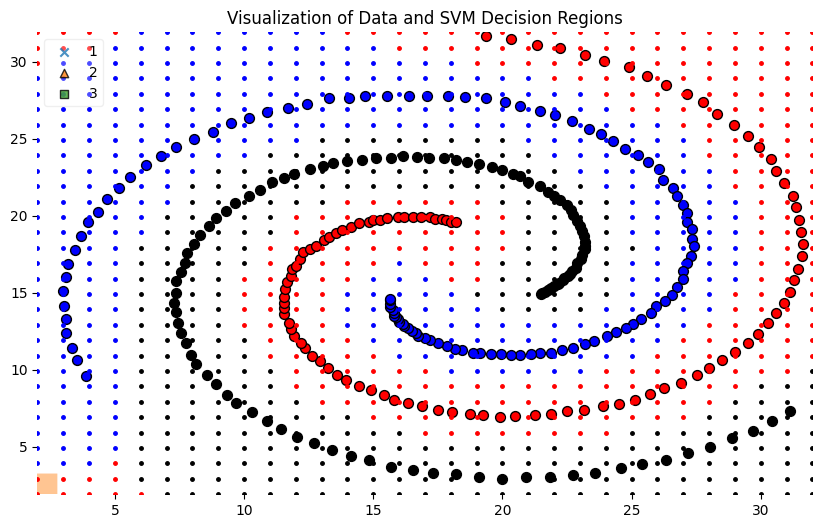

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

# Reading data from file
data = pd.read_csv('/content/Spiral.txt', delimiter='\t', skiprows=7)

# Correct column renaming
column_names = ['Feature1', 'Feature2', 'Category']  # Adjust the names as per the actual structure of your data.
data.columns = column_names

# Selecting features and categories
features = data[['Feature1', 'Feature2']].values
categories = data['Category'].values

# Dividing data into training and validation subsets
train_features, test_features, train_labels, test_labels = train_test_split(features, categories, test_size=0.20, random_state=42)

# Normalizing features
normalizer = StandardScaler()
normalized_train = normalizer.fit_transform(train_features)
normalized_test = normalizer.transform(test_features)

# Creating a mesh grid for the plot
min_feature1, max_feature1 = features[:, 0].min() - 1, features[:, 0].max() + 1
min_feature2, max_feature2 = features[:, 1].min() - 1, features[:, 1].max() + 1
step = 1
grid_feature1, grid_feature2 = np.meshgrid(np.arange(min_feature1, max_feature1, step), np.arange(min_feature2, max_feature2, step))

# Mesh grid for SVM
mesh_input = np.c_[grid_feature1.ravel(), grid_feature2.ravel()]
normalized_mesh = normalizer.transform(mesh_input)

# SVM with RBF kernel
svm_classifier = SVC(kernel='rbf', gamma=2, C=2)
svm_classifier.fit(normalized_train, train_labels)

# Prediction over mesh grid
mesh_predictions = svm_classifier.predict(normalized_mesh)
reshaped_predictions = mesh_predictions.reshape(grid_feature1.shape)

plt.figure(figsize=(10, 6))

# Visualizing decision regions
plot_decision_regions(X=normalized_train, y=train_labels, clf=svm_classifier, legend=2, markers='x^sv<>', scatter_highlight_kwargs={'s': 100, 'label': 'Test Data'})

# Color palette for plotting
palette = ['red', 'blue', 'black']
color_mapping = {key: color for key, color in zip(np.unique(train_labels), palette)}

# Plotting original data points
for class_value in np.unique(categories):
    plt.scatter(features[categories == class_value, 0], features[categories == class_value, 1], c=color_mapping[class_value], label=f'Category {class_value}', edgecolors='k', s=50)

# Plotting SVM classification results
for i in range(grid_feature1.shape[0]):
    for j in range(grid_feature2.shape[1]):
        mesh_point = np.array([[grid_feature1[i, j], grid_feature2[i, j]]])
        normalized_point = normalizer.transform(mesh_point)
        class_prediction = svm_classifier.predict(normalized_point)
        plt.plot(grid_feature1[i, j], grid_feature2[i, j], marker='.', markersize=5, c=color_mapping[class_prediction[0]])

plt.xlim(grid_feature1.min(), grid_feature1.max())
plt.ylim(grid_feature2.min(), grid_feature2.max())
plt.title("Visualization of Data and SVM Decision Regions")
plt.show()
